<a href="https://colab.research.google.com/github/Bdet23/The-Effect-of-Travel-on-MLB-Team-Performance/blob/CreateOPS%2B-and-Other-data-manipulation/2024DataThon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving timezones (1).csv to timezones (1).csv
Saving datathon_2024_dataset_corrected.csv to datathon_2024_dataset_corrected (1).csv
Saving newData.csv to newData (3).csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['datathon_2024_dataset_corrected (1).csv']))
df


,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,56770,20231001,CHA,SDN,True,1,2,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,IL,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1
56771,56771,20231001,DET,CLE,True,5,2,DET05,Comerica Park,Detroit,MI,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0
56772,56772,20231001,KCA,NYA,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0
56773,56773,20231001,SEA,TEX,True,1,0,SEA03,Safeco Field,Seattle,WA,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1


In [ ]:
location = pd.read_csv(io.BytesIO(uploaded['newData (3).csv']))

## Making Basic Stats


In [ ]:
#making on base percentage
df['home_OBP']=(df['home_1b']+df['home_2b']+df['home_3b']+df['home_hr']+df['home_bb']+df['home_hbp'])/df['home_pa']
df['away_OBP']=(df['away_1b']+df['away_2b']+df['away_3b']+df['away_hr']+df['away_bb']+df['away_hbp'])/df['away_pa']

In [ ]:
#making batting average
df['home_AVG']=(df['home_1b']+df['home_2b']+df['home_3b']+df['home_hr'])/df['home_pa']
df['away_AVG']=(df['away_1b']+df['away_2b']+df['away_3b']+df['away_hr'])/df['away_pa']

In [ ]:
#making slugging percentage
df['home_SLG']=(df['home_1b']+(df['home_2b']*2)+(df['home_3b']*3)+(df['home_hr']*4))/df['home_pa']
df['away_SLG']=(df['away_1b']+(df['away_2b']*2)+(df['away_3b']*3)+(df['away_hr']*4))/df['away_pa']

In [ ]:
#creating OPS
df['home_OPS']=df['home_OBP']+df['home_SLG']
df['away_OPS']=df['away_OBP']+df['away_SLG']

## The Quest for OPS+

In [ ]:
df['season']=(df['game_date'].astype(str))

In [ ]:
#made a season column that contains the season year
df['season']=df['season'].str[:4]

In [ ]:
#use a series of groupby in order to make a league OPS+
HAAB = df[['season','home_pa','away_pa']].groupby('season', as_index=False).sum()

In [ ]:
HAAB['total_pa']=HAAB['home_pa']+HAAB['away_pa']

In [ ]:
HAOPS=df[['season','home_OBP','away_OBP','home_SLG','away_SLG' ]].groupby('season', as_index=False).mean()

In [ ]:
HAOPS['lgOPB']=((HAOPS['home_OBP']*HAAB['home_pa'])+HAOPS['away_OBP']*HAAB['away_pa'])/HAAB['total_pa']
HAOPS['lgSLG']=((HAOPS['home_SLG']*HAAB['home_pa'])+HAOPS['away_SLG']*HAAB['away_pa'])/HAAB['total_pa']


In [ ]:
HAOPS.drop(columns=['home_OBP', 'home_SLG','away_SLG', 'away_OBP'], inplace=True)

In [ ]:
HAOPS

,season,lgOPB,lgSLG
0,2000,0.334523,0.376971
1,2001,0.322072,0.371905
2,2002,0.320848,0.362104
3,2003,0.322549,0.368136
4,2004,0.324726,0.372403
5,2005,0.320194,0.366600
6,2006,0.325940,0.376344
7,2007,0.325517,0.368713
8,2008,0.322807,0.362407
9,2009,0.322760,0.363267


In [ ]:
df=df.merge(right=HAOPS, on='season', how='outer')


In [ ]:
df['home_OPS+']=100*((df['home_OBP']/df['lgOPB'])+(df['home_SLG']/df['lgSLG'])-1)
df['away_OPS+']=100*((df['away_OBP']/df['lgOPB'])+(df['away_SLG']/df['lgSLG'])-1)

## Making team OPS+ for offense

In [ ]:
away_pa=df[['away_team','season','away_pa']].groupby(['away_team', 'season'], as_index=False).sum()

In [ ]:
home_pa=df[['home_team','season','home_pa']].groupby(['home_team', 'season'], as_index=False).sum()

In [ ]:
away_stats=df[['away_team','away_OBP','away_SLG', 'season']].groupby(['away_team', 'season'], as_index=False).mean()

In [ ]:
home_stats=df[['home_team','home_OBP','home_SLG', 'season']].groupby(['home_team', 'season'], as_index=False).mean()

In [ ]:
team = away_pa.merge(right=home_pa, right_on=['home_team', 'season'], left_on=['away_team', 'season'], how='outer')

In [ ]:
team = team.merge(right=away_stats, on=['season', 'away_team'], how='outer')

In [ ]:
team = team.merge(right=home_stats, on=['season', 'home_team'], how='outer')

In [ ]:
team['team_SLG']=((team['home_SLG']*team['home_pa'])+team['away_SLG']*team['away_pa'])/(team['home_pa']+team['away_pa'])
team['team_OBP']=((team['home_OBP']*team['home_pa'])+team['away_OBP']*team['away_pa'])/(team['home_pa']+team['away_pa'])

In [ ]:
team_reduce = team.drop(columns=['home_team','away_pa', 'home_pa','away_OBP', 'away_SLG', 'home_OBP', 'home_SLG'])

In [ ]:
team_reduce.rename(columns={'away_team':'team'}, inplace=True)

In [ ]:
df=df.merge(right=team_reduce, right_on=['team', 'season'], left_on=['away_team','season'], how='outer')

In [ ]:
df.drop(columns='team', inplace=True)

In [ ]:
df.rename(columns={'team_SLG':'away_team_season_SLG', 'team_OBP':'away_team_season_OBP'},inplace=True)

In [ ]:
df=df.merge(right=team_reduce, right_on=['team', 'season'], left_on=['home_team','season'], how='outer')

In [ ]:
df.drop(columns='team', inplace=True)

In [ ]:
df.rename(columns={'team_SLG':'home_team_season_SLG', 'team_OBP':'home_team_season_OBP'},inplace=True)

In [ ]:
df['home_team_season_OPS+']=100*((df['home_team_season_OBP']/df['lgOPB'])+(df['home_team_season_SLG']/df['lgSLG'])-1)
df['away_team_season_OPS+']=100*((df['away_team_season_OBP']/df['lgOPB'])+(df['away_team_season_SLG']/df['lgSLG'])-1)

In [ ]:
team

,away_team,season,away_pa,home_team,home_pa,away_OBP,away_SLG,home_OBP,home_SLG,team_SLG,team_OBP
0,ANA,2000,3245,ANA,3128,0.332177,0.394692,0.355874,0.428199,0.411138,0.343808
1,ANA,2001,3154,ANA,3067,0.311035,0.344015,0.323635,0.364471,0.354100,0.317247
2,ANA,2002,3256,ANA,3071,0.331022,0.384399,0.328953,0.374668,0.379676,0.330018
3,ANA,2003,3134,ANA,2985,0.321495,0.365003,0.319826,0.359547,0.362341,0.320681
4,ANA,2004,3219,ANA,3076,0.330722,0.386985,0.331755,0.372093,0.379708,0.331227
...,...,...,...,...,...,...,...,...,...,...,...
715,WAS,2019,3169,WAS,3098,0.318815,0.363046,0.342628,0.418152,0.390287,0.330587
716,WAS,2020,1043,WAS,1175,0.343411,0.404531,0.312930,0.349522,0.375390,0.327264
717,WAS,2021,3168,WAS,2943,0.325313,0.348113,0.329260,0.370029,0.358668,0.327214
718,WAS,2022,3068,WAS,2925,0.310738,0.335198,0.293674,0.335532,0.335361,0.302409


In [ ]:
team_merge_prep=df[['season', 'away_team', 'away_team_season_OPS+', 'lgSLG', 'lgOPB']]

In [ ]:
team=team.merge(right=team_merge_prep, on=['season', 'away_team'], how='outer')

In [ ]:
team.drop_duplicates(keep='first', inplace=True)

In [ ]:
team['team_OPS+']=100*((team['team_OBP']/team['lgOPB'])+(team['team_SLG']/team['lgSLG'])-1)

In [ ]:
team.drop(columns='away_team_season_OPS+', inplace=True)

In [ ]:
team['team_home_OPS+']=100*((team['home_OBP']/team['lgOPB'])+(team['home_SLG']/team['lgSLG'])-1)
team['team_away_OPS+']=100*((team['away_OBP']/team['lgOPB'])+(team['away_SLG']/team['lgSLG'])-1)

In [ ]:
team

,away_team,season,away_pa,home_team,home_pa,away_OBP,away_SLG,home_OBP,home_SLG,team_SLG,team_OBP,lgSLG,lgOPB,team_OPS+,team_home_OPS+,team_away_OPS+
0,ANA,2000,3245,ANA,3128,0.332177,0.394692,0.355874,0.428199,0.411138,0.343808,0.376971,0.334523,111.838934,119.971591,103.999503
81,ANA,2001,3154,ANA,3067,0.311035,0.344015,0.323635,0.364471,0.354100,0.317247,0.371905,0.322072,93.714341,98.486502,89.073816
162,ANA,2002,3256,ANA,3071,0.331022,0.384399,0.328953,0.374668,0.379676,0.330018,0.362104,0.320848,107.710667,105.995859,109.328044
243,ANA,2003,3134,ANA,2985,0.321495,0.365003,0.319826,0.359547,0.362341,0.320681,0.368136,0.322549,97.846827,96.822606,98.822354
323,ANA,2004,3219,ANA,3076,0.330722,0.386985,0.331755,0.372093,0.379708,0.331227,0.372403,0.324726,103.963720,102.081399,105.762421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56424,WAS,2019,3169,WAS,3098,0.318815,0.363046,0.342628,0.418152,0.390287,0.330587,0.380132,0.313693,108.056772,119.225633,97.138145
56505,WAS,2020,1043,WAS,1175,0.343411,0.404531,0.312930,0.349522,0.375390,0.327264,0.362228,0.313510,108.020758,96.307455,121.216473
56532,WAS,2021,3168,WAS,2943,0.325313,0.348113,0.329260,0.370029,0.358668,0.327214,0.357972,0.308161,106.376989,110.214974,102.811588
56613,WAS,2022,3068,WAS,2925,0.310738,0.335198,0.293674,0.335532,0.335361,0.302409,0.346590,0.303564,96.379974,93.551605,99.076512


## Making an OPS+ against metric to look at pitching

In [ ]:
away_pitch=df[['away_team','season','home_pa']].groupby(['away_team', 'season'], as_index=False).sum()

In [ ]:
home_pitch=df[['home_team','season','away_pa']].groupby(['home_team', 'season'], as_index=False).sum()

In [ ]:
away_pitch_stats=df[['away_team','home_OBP','home_SLG', 'season']].groupby(['away_team', 'season'], as_index=False).mean()
home_pitch_stats=df[['home_team','away_OBP','away_SLG', 'season']].groupby(['home_team', 'season'], as_index=False).mean()

In [ ]:
team_pitch = away_pitch.merge(right=home_pitch, right_on=['home_team', 'season'], left_on=['away_team', 'season'], how='outer')


In [ ]:
team_pitch = team_pitch.merge(right=away_pitch_stats, on=['season', 'away_team'], how='outer')

In [ ]:
team_pitch = team_pitch.merge(right=home_pitch_stats, on=['season', 'home_team'], how='outer')

In [ ]:
team_pitch['allowed_SLG']=((team_pitch['home_SLG']*team_pitch['home_pa'])+(team_pitch['away_SLG']*team_pitch['away_pa']))/(team_pitch['home_pa']+team_pitch['away_pa'])
team_pitch['allowed_OBP']=((team_pitch['home_OBP']*team_pitch['home_pa'])+(team_pitch['away_OBP']*team_pitch['away_pa']))/(team_pitch['home_pa']+team_pitch['away_pa'])

In [ ]:
pitch_merge_prep=team_merge_prep.drop(columns=['away_team_season_OPS+'])

In [ ]:
pitch_merge_prep

,season,away_team,lgSLG,lgOPB
0,2000,CHN,0.376971,0.334523
1,2000,CHN,0.376971,0.334523
2,2000,CHN,0.376971,0.334523
3,2000,CHN,0.376971,0.334523
4,2000,COL,0.376971,0.334523
...,...,...,...,...
56770,2023,OAK,0.361539,0.311594
56771,2023,OAK,0.361539,0.311594
56772,2023,OAK,0.361539,0.311594
56773,2023,OAK,0.361539,0.311594


In [ ]:
team_pitch=team_pitch.merge(right=pitch_merge_prep, on=['season', 'away_team'], how='outer')

In [ ]:
team_pitch

,away_team,season,home_pa,home_team,away_pa,home_OBP,home_SLG,away_OBP,away_SLG,allowed_SLG,allowed_OBP,lgSLG,lgOPB
0,ANA,2000,3149,ANA,3251,0.343146,0.389898,0.338285,0.387365,0.388612,0.340677,0.376971,0.334523
1,ANA,2000,3149,ANA,3251,0.343146,0.389898,0.338285,0.387365,0.388612,0.340677,0.376971,0.334523
2,ANA,2000,3149,ANA,3251,0.343146,0.389898,0.338285,0.387365,0.388612,0.340677,0.376971,0.334523
3,ANA,2000,3149,ANA,3251,0.343146,0.389898,0.338285,0.387365,0.388612,0.340677,0.376971,0.334523
4,ANA,2000,3149,ANA,3251,0.343146,0.389898,0.338285,0.387365,0.388612,0.340677,0.376971,0.334523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,WAS,2023,3071,WAS,3213,0.338479,0.400072,0.337231,0.391012,0.395440,0.337841,0.361539,0.311594
56771,WAS,2023,3071,WAS,3213,0.338479,0.400072,0.337231,0.391012,0.395440,0.337841,0.361539,0.311594
56772,WAS,2023,3071,WAS,3213,0.338479,0.400072,0.337231,0.391012,0.395440,0.337841,0.361539,0.311594
56773,WAS,2023,3071,WAS,3213,0.338479,0.400072,0.337231,0.391012,0.395440,0.337841,0.361539,0.311594


In [ ]:
team_pitch['allowed_OPS+']=100*((team_pitch['allowed_OBP']/team_pitch['lgOPB'])+(team_pitch['allowed_SLG']/team_pitch['lgSLG'])-1)

In [ ]:
team_pitch['home_allowed_OPS+']=100*((team_pitch['away_OBP']/team_pitch['lgOPB'])+(team_pitch['away_SLG']/team_pitch['lgSLG'])-1)
team_pitch['away_allowed_OPS+']=100*((team_pitch['home_OBP']/team_pitch['lgOPB'])+(team_pitch['home_SLG']/team_pitch['lgSLG'])-1)

In [ ]:
team_pitch.drop_duplicates(keep='first', inplace=True)

In [ ]:
team_pitch.loc[team_pitch['season']=='2022'].loc[team_pitch['home_allowed_OPS+']<team_pitch['away_allowed_OPS+']]

,away_team,season,home_pa,home_team,away_pa,home_OBP,home_SLG,away_OBP,away_SLG,allowed_SLG,allowed_OBP,lgSLG,lgOPB,allowed_OPS+,home_allowed_OPS+,away_allowed_OPS+
1728,ANA,2022,2960,ANA,3076,0.307797,0.329856,0.287208,0.328168,0.328996,0.297305,0.34659,0.303564,92.862029,89.297146,96.566616
3621,ARI,2022,2957,ARI,3104,0.310038,0.379068,0.304088,0.344762,0.361499,0.306991,0.34659,0.303564,105.430793,99.645632,111.503549
5512,ATL,2022,2965,ATL,3065,0.295015,0.321902,0.283548,0.299154,0.310339,0.289187,0.34659,0.303564,84.804701,79.720050,90.060841
7407,BAL,2022,2917,BAL,3135,0.305985,0.378502,0.312436,0.346005,0.361668,0.309327,0.34659,0.303564,106.249103,102.754102,110.005301
13079,CHN,2022,3075,CHN,3084,0.322173,0.386424,0.299731,0.342269,0.364314,0.310936,0.34659,0.303564,107.542451,97.490816,117.623505
16868,CLE,2022,2943,CLE,3046,0.287905,0.335631,0.280753,0.332103,0.333837,0.284267,0.34659,0.303564,89.963876,88.305920,91.679858
20654,DET,2022,2890,DET,3156,0.313863,0.358638,0.304081,0.330940,0.344180,0.308757,0.34659,0.303564,101.015358,95.655052,106.869034
23524,HOU,2022,2928,HOU,2928,0.281541,0.299646,0.265347,0.289697,0.294672,0.273444,0.34659,0.303564,75.098293,70.995791,79.200795
25419,KCA,2022,3055,KCA,3194,0.341149,0.379785,0.331895,0.349418,0.364264,0.336419,0.34659,0.303564,115.922665,110.149089,121.958935
30130,MIL,2022,3005,MIL,3046,0.314095,0.340217,0.276789,0.339769,0.339991,0.295315,0.34659,0.303564,95.379061,89.211961,101.630305


In [ ]:
team.loc[team['season']=='2022'].loc[team['team_home_OPS+']>team['team_away_OPS+']]

,away_team,season,away_pa,home_team,home_pa,away_OBP,away_SLG,home_OBP,home_SLG,team_SLG,team_OBP,lgSLG,lgOPB,team_OPS+,team_home_OPS+,team_away_OPS+
1728,ANA,2022,3019,ANA,2957,0.278017,0.323343,0.301865,0.370932,0.346890,0.289817,0.34659,0.303564,95.558416,106.463742,84.877049
5512,ATL,2022,3132,ATL,2950,0.302975,0.386342,0.317523,0.404024,0.394918,0.310031,0.34659,0.303564,116.074548,121.169690,111.275483
9298,BOS,2022,3107,BOS,3035,0.298146,0.327664,0.325170,0.392891,0.359895,0.311499,0.34659,0.303564,106.453081,120.476460,92.754674
11191,CHA,2022,3129,CHA,2994,0.301282,0.347834,0.303395,0.346224,0.347047,0.302315,0.34659,0.303564,99.720620,99.838912,99.607431
13079,CHN,2022,3085,CHN,2986,0.292544,0.331769,0.312785,0.341741,0.336674,0.302499,0.34659,0.303564,96.788327,101.638520,92.093781
14974,CIN,2022,2994,CIN,2975,0.279581,0.309113,0.314291,0.348738,0.328862,0.296881,0.34659,0.303564,92.683696,104.153478,81.286701
18761,COL,2022,2999,COL,3105,0.278517,0.301801,0.339647,0.405731,0.354669,0.309613,0.34659,0.303564,104.323685,128.950551,78.826380
20654,DET,2022,2936,DET,2934,0.272126,0.307944,0.283743,0.306872,0.307408,0.277933,0.34659,0.303564,80.251721,82.011160,78.493481
23524,HOU,2022,3124,HOU,2924,0.301137,0.347704,0.322379,0.391270,0.368767,0.311407,0.34659,0.303564,108.982387,119.089553,99.522286
25419,KCA,2022,3062,KCA,2947,0.286640,0.317770,0.310280,0.356250,0.336642,0.298234,0.34659,0.303564,95.373949,104.999827,86.109591


<Axes: xlabel='home_team'>

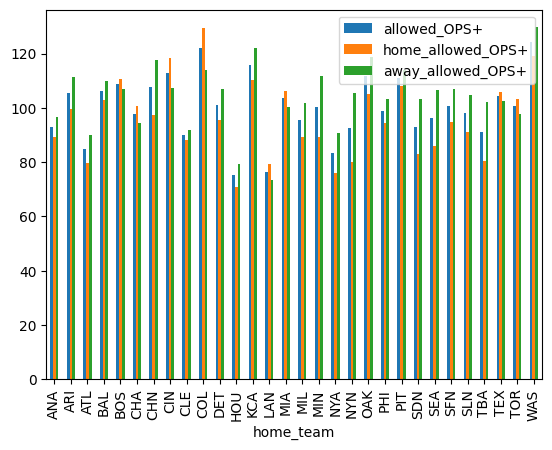

In [ ]:
team_pitch.loc[team_pitch['season']=='2022'][['allowed_OPS+', 'home_allowed_OPS+', 'away_allowed_OPS+', 'home_team']].plot(kind='bar', x='home_team')

<Axes: xlabel='home_team'>

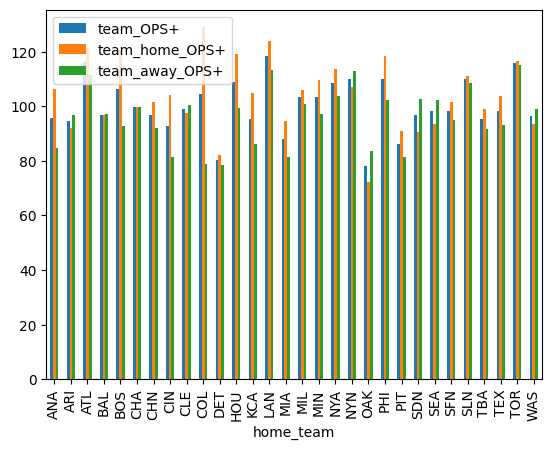

In [ ]:
team.loc[team['season']=='2022'][['team_OPS+', 'team_home_OPS+', 'team_away_OPS+', 'home_team']].plot(kind='bar', x='home_team')

In [ ]:
df['home_won']=(df['home_score']>df['away_score'])*1
df['away_won']=(df['home_score']<df['away_score'])*1

In [ ]:
df.loc[df['season']=='2023'][['home_team', 'home_won']].groupby('home_team', as_index=True).sum()

,home_won
home_team,
ANA,38
ARI,43
ATL,52
BAL,49
BOS,39
CHA,31
CHN,45
CIN,38
CLE,42


## Adding the location and distance

In [ ]:
location

,id,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,away_distance,away_longitude,away_gap,home_distance,home_longitude,home_gap
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0,0,0.0,True,0,0.0,True
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0,0,0.0,False,0,0.0,False
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0,0.0,True,0,0.0,True
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0,0.0,True,0,0.0,True
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0,0.0,True,0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,56770,20231001,CHA,SDN,True,1,2,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,IL,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1,0,0.0,True,0,0.0,True
56771,56771,20231001,DET,CLE,True,5,2,DET05,Comerica Park,Detroit,MI,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0,0,0.0,True,0,0.0,True
56772,56772,20231001,KCA,NYA,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0,0,0.0,True,0,0.0,True
56773,56773,20231001,SEA,TEX,True,1,0,SEA03,Safeco Field,Seattle,WA,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1,0,0.0,True,0,0.0,True


In [ ]:
location_merge_prep=location[['game_date','home_team','away_team', 'away_distance', 'away_longitude','away_gap','home_distance','home_longitude','home_gap']]

In [ ]:
df_location = df.merge(right=location_merge_prep, on=['game_date','home_team', 'away_team'], how='outer')

In [ ]:
df_location.drop_duplicates(keep='first', inplace=True)

In [ ]:
df_location

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,home_OBP,away_OBP,home_AVG,away_AVG,home_SLG,away_SLG,home_OPS,away_OPS,season,lgOPB,lgSLG,home_OPS+,away_OPS+,away_team_season_SLG,away_team_season_OBP,home_team_season_SLG,home_team_season_OBP,home_team_season_OPS+,away_team_season_OPS+,home_won,away_won,away_distance,away_longitude,away_gap,home_distance,home_longitude,home_gap
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0,0.263158,0.511111,0.184211,0.266667,0.289474,0.422222,0.552632,0.933333,2000,0.334523,0.376971,55.455850,164.791705,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,0,1,0,0.0000,True,0,0.0000,True
1,251,20000422,NYN,CHN,True,8,3,NYC17,Shea Stadium,New York,NY,36,5,1,0,2,22,5,1,0,41,9,3,0,0,19,3,6,1,0.463415,0.250000,0.292683,0.222222,0.365854,0.416667,0.829268,0.666667,2000,0.334523,0.376971,135.580650,85.263281,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,1,0,536769,-0.3632,True,0,0.0000,True
3,252,20000422,NYN,CHN,True,7,6,NYC17,Shea Stadium,New York,NY,42,6,4,0,1,21,5,4,1,37,6,3,0,1,14,6,7,0,0.459459,0.380952,0.270270,0.261905,0.432432,0.428571,0.891892,0.809524,2000,0.334523,0.376971,152.059813,127.567252,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,1,0,536769,-0.3632,True,0,0.0000,True
5,266,20000423,NYN,CHN,True,15,8,NYC17,Shea Stadium,New York,NY,42,4,4,0,2,24,4,4,0,45,11,4,0,3,16,9,2,0,0.444444,0.333333,0.400000,0.238095,0.688889,0.476190,1.133333,0.809524,2000,0.334523,0.376971,215.602091,125.964361,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,1,0,0,0.0000,False,0,0.0000,False
6,563,20000516,NYN,COL,False,3,4,NYC17,Shea Stadium,New York,NY,44,6,2,0,1,17,14,4,0,44,6,4,0,2,22,7,3,0,0.340909,0.295455,0.272727,0.204545,0.500000,0.318182,0.840909,0.613636,2000,0.334523,0.376971,134.545008,72.725849,0.390540,0.349814,0.364148,0.334958,96.728346,108.170283,0,1,0,0.0000,True,2618935,30.9509,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58232,55028,20230520,HOU,OAK,True,3,2,HOU03,Minute Maid Park,Houston,TX,34,6,1,0,0,15,11,1,0,33,4,2,0,1,16,8,2,0,0.272727,0.235294,0.212121,0.205882,0.363636,0.235294,0.636364,0.470588,2023,0.311594,0.361539,88.106422,40.594171,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,1,0,0,0.0000,False,0,0.0000,False
58233,55044,20230521,HOU,OAK,True,2,0,HOU03,Minute Maid Park,Houston,TX,30,3,1,0,0,19,7,0,0,34,3,2,0,0,14,7,8,0,0.382353,0.133333,0.147059,0.133333,0.205882,0.166667,0.588235,0.300000,2023,0.311594,0.361539,79.654654,-11.110138,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,1,0,0,0.0000,False,0,0.0000,False
58234,56500,20230911,HOU,OAK,False,0,4,HOU03,Minute Maid Park,Houston,TX,34,3,1,0,3,13,13,1,0,32,3,0,0,0,20,6,2,1,0.187500,0.235294,0.093750,0.205882,0.093750,0.500000,0.281250,0.735294,2023,0.311594,0.361539,-13.894797,113.810483,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,0,1,0,0.0000,False,364024,1.7365,False
58235,56517,20230912,HOU,OAK,False,2,6,HOU03,Minute Maid Park,Houston,TX,38,4,4,0,2,20,7,0,1,34,4,2,0,0,18,8,2,0,0.235294,0.289474,0.176471,0.263158,0.235294,0.526316,0.470588,0.815789,2023,0.311594,0.361539,40.594171,138.477160,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,0,1,0,0.0000,False,0,0.0000,False


In [ ]:
df_location.columns

Index(['Unnamed: 0', 'game_date', 'home_team', 'away_team', 'is_day_game',
       'home_score', 'away_score', 'venue', 'venue_name', 'city', 'state',
       'away_pa', 'away_1b', 'away_2b', 'away_3b', 'away_hr', 'away_fo',
       'away_so', 'away_bb', 'away_hbp', 'home_pa', 'home_1b', 'home_2b',
       'home_3b', 'home_hr', 'home_fo', 'home_so', 'home_bb', 'home_hbp',
       'home_OBP', 'away_OBP', 'home_AVG', 'away_AVG', 'home_SLG', 'away_SLG',
       'home_OPS', 'away_OPS', 'season', 'lgOPB', 'lgSLG', 'home_OPS+',
       'away_OPS+', 'away_team_season_SLG', 'away_team_season_OBP',
       'home_team_season_SLG', 'home_team_season_OBP', 'home_team_season_OPS+',
       'away_team_season_OPS+', 'home_won', 'away_won', 'away_distance',
       'away_longitude', 'away_gap', 'home_distance', 'home_longitude',
       'home_gap'],
      dtype='object')

In [ ]:
df_location['away_did_travel']=(df_location['away_distance']>0)*1

In [ ]:
df_location['home_did_travel']=(df_location['home_distance']>0)*1

## Finding travel/no travel splits

In [ ]:
away_travel=df_location[['away_did_travel','away_team', 'away_pa', 'season']].groupby(['away_did_travel', 'away_team','season'], as_index=False).sum()
home_travel=df_location[['home_did_travel','home_team', 'home_pa', 'season']].groupby(['home_did_travel', 'home_team','season'], as_index=False).sum()

In [ ]:
away_travel_stats=df_location[['away_did_travel','away_team', 'away_SLG','away_OBP', 'season']].groupby(['away_did_travel', 'away_team','season'], as_index=False).mean()
home_travel_stats=df_location[['home_did_travel','home_team', 'home_SLG', 'home_OBP', 'season']].groupby(['home_did_travel', 'home_team','season'], as_index=False).mean()

In [ ]:
away_travel_stats

,away_did_travel,away_team,season,away_SLG,away_OBP
0,0,ANA,2000,0.386639,0.330511
1,0,ANA,2001,0.345179,0.309136
2,0,ANA,2002,0.374335,0.324924
3,0,ANA,2003,0.357482,0.318687
4,0,ANA,2004,0.368440,0.325230
...,...,...,...,...,...
1435,1,WAS,2019,0.405344,0.351618
1436,1,WAS,2020,0.463223,0.390900
1437,1,WAS,2021,0.328814,0.302637
1438,1,WAS,2022,0.297173,0.255949


In [ ]:
travel=away_travel.merge(right=home_travel,how='outer', right_on=['home_team','home_did_travel', 'season'], left_on=['away_team','away_did_travel', 'season'])

In [ ]:
travel=travel.merge(right=away_travel_stats, how='outer', on=['season', 'away_did_travel', 'away_team'])

In [ ]:
travel=travel.merge(right=home_travel_stats, how='outer', on=['season', 'home_did_travel', 'home_team'])

In [ ]:
travel['team_SLG']=((travel['home_SLG']*travel['home_pa'])+(travel['away_SLG']*travel['away_pa']))/(travel['home_pa']+travel['away_pa'])
travel['team_OBP']=((travel['home_OBP']*travel['home_pa'])+(travel['away_OBP']*travel['away_pa']))/(travel['home_pa']+travel['away_pa'])

In [ ]:
travel.drop_duplicates(keep='first', inplace=True)

In [ ]:
pitch_merge_prep

,season,away_team,lgSLG,lgOPB
0,2000,CHN,0.376971,0.334523
1,2000,CHN,0.376971,0.334523
2,2000,CHN,0.376971,0.334523
3,2000,CHN,0.376971,0.334523
4,2000,COL,0.376971,0.334523
...,...,...,...,...
56770,2023,OAK,0.361539,0.311594
56771,2023,OAK,0.361539,0.311594
56772,2023,OAK,0.361539,0.311594
56773,2023,OAK,0.361539,0.311594


In [ ]:
travel=travel.merge(right=pitch_merge_prep,how='outer', on=['away_team','season'])

In [ ]:
travel['team_OPS+']=100*((travel['team_OBP']/travel['lgOPB'])+(travel['team_SLG']/travel['lgSLG'])-1)

In [ ]:
travel.drop_duplicates(keep='first', inplace=True)

In [ ]:
did_trav = travel.loc[travel['away_did_travel']==0]
no_trav = travel.loc[travel['away_did_travel']==1]

In [ ]:
did_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-801-91322a8102e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
no_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-802-2f29a10241e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
did_trav.rename(columns={'away_team':'team','team_SLG':'no_travel_SLG','team_OBP':'no_travel_OBP','team_OPS+':'no_travel_OPS+'},inplace=True)

<ipython-input-803-60fb94badcdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_trav.rename(columns={'away_team':'team','team_SLG':'no_travel_SLG','team_OBP':'no_travel_OBP','team_OPS+':'no_travel_OPS+'},inplace=True)


In [ ]:
no_trav.rename(columns={'away_team':'team','team_SLG':'travel_SLG','team_OBP':'travel_OBP','team_OPS+':'travel_OPS+'},inplace=True)

<ipython-input-804-cc9c636b3ac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_trav.rename(columns={'away_team':'team','team_SLG':'travel_SLG','team_OBP':'travel_OBP','team_OPS+':'travel_OPS+'},inplace=True)


In [ ]:
no_trav

,away_did_travel,team,season,travel_SLG,travel_OBP,lgSLG,lgOPB,travel_OPS+
81,1,ANA,2000,0.449704,0.356406,0.376971,0.334523,125.835562
243,1,ANA,2001,0.352803,0.325744,0.371905,0.322072,96.003904
405,1,ANA,2002,0.419987,0.352941,0.362104,0.320848,125.987830
566,1,ANA,2003,0.383338,0.320003,0.368136,0.322549,103.340148
727,1,ANA,2004,0.480926,0.373728,0.372403,0.324726,144.231862
...,...,...,...,...,...,...,...,...
112929,1,WAS,2019,0.399092,0.335893,0.380132,0.313693,112.064707
113037,1,WAS,2020,0.418360,0.362607,0.362228,0.313510,131.156871
113145,1,WAS,2021,0.359700,0.305126,0.357972,0.308161,99.497913
113307,1,WAS,2022,0.320478,0.286313,0.346590,0.303564,86.783264


In [ ]:
travel_splits_offense = no_trav.merge(right=did_trav, on=['team','season'],how='outer')

In [ ]:
travel_splits_offense.drop(columns=['away_did_travel_x','away_did_travel_y'],inplace=True)

<Axes: xlabel='team'>

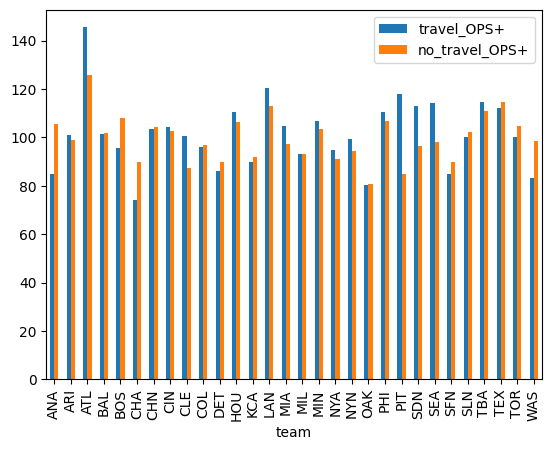

In [ ]:
travel_splits_offense.loc[travel_splits_offense['season']=='2023'][['team', 'travel_OPS+','no_travel_OPS+']].plot(kind='bar', x='team')

In [ ]:
travel_splits_offense['percent_difference']= (travel_splits_offense['no_travel_OPS+']-travel_splits_offense['travel_OPS+'])/((travel_splits_offense['no_travel_OPS+']+travel_splits_offense['travel_OPS+'])/2)

<Axes: xlabel='team'>

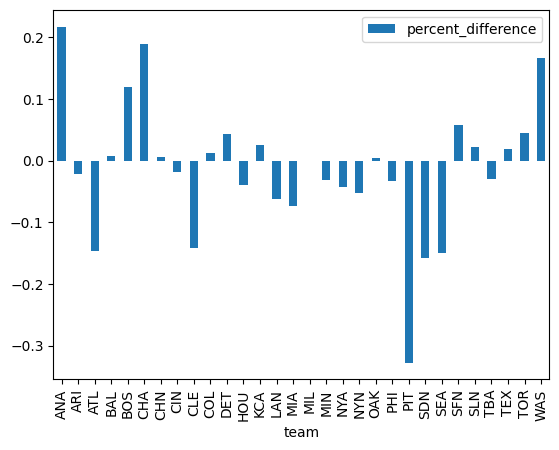

In [ ]:
travel_splits_offense.loc[travel_splits_offense['season']=='2023'][['team', 'percent_difference']].plot(kind='bar', x='team')

In [ ]:
mean_trav_off=travel_splits_offense[['percent_difference','season']].groupby('season').mean()

In [ ]:
mean_trav_off

,percent_difference
season,
2000,0.027629
2001,-0.006392
2002,-0.017230
2003,-0.030207
2004,-0.019288
2005,-0.011082
2006,-0.039903
2007,-0.032634
2008,-0.006625


In [ ]:
team_avg_OPS = team[['away_team','season','team_OPS+']]

In [ ]:
travel_splits_offense=travel_splits_offense.merge(right=team_avg_OPS,left_on=['team','season'], right_on=['away_team','season'])

In [ ]:
travel_splits_offense

,team,season,travel_SLG,travel_OBP,lgSLG_x,lgOPB_x,travel_OPS+,no_travel_SLG,no_travel_OBP,lgSLG_y,lgOPB_y,no_travel_OPS+,percent_difference,away_team,team_OPS+
0,ANA,2000,0.449704,0.356406,0.376971,0.334523,125.835562,0.404407,0.341591,0.376971,0.334523,109.390682,-0.139822,ANA,111.838934
1,ANA,2001,0.352803,0.325744,0.371905,0.322072,96.003904,0.354319,0.315968,0.371905,0.322072,93.376046,-0.027752,ANA,93.714341
2,ANA,2002,0.419987,0.352941,0.362104,0.320848,125.987830,0.372386,0.325885,0.362104,0.320848,104.409422,-0.187315,ANA,107.710667
3,ANA,2003,0.383338,0.320003,0.368136,0.322549,103.340148,0.359018,0.320880,0.368136,0.322549,97.005894,-0.063233,ANA,97.846827
4,ANA,2004,0.480926,0.373728,0.372403,0.324726,144.231862,0.365536,0.325231,0.372403,0.324726,98.311590,-0.378656,ANA,103.963720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,WAS,2019,0.399092,0.335893,0.380132,0.313693,112.064707,0.389095,0.329907,0.380132,0.313693,107.526721,-0.041331,WAS,108.056772
716,WAS,2020,0.418360,0.362607,0.362228,0.313510,131.156871,0.366556,0.319988,0.362228,0.313510,103.261366,-0.237998,WAS,108.020758
717,WAS,2021,0.359700,0.305126,0.357972,0.308161,99.497913,0.358567,0.331675,0.357972,0.308161,107.796704,0.080068,WAS,106.376989
718,WAS,2022,0.320478,0.286313,0.346590,0.303564,86.783264,0.338007,0.305383,0.346590,0.303564,98.122772,0.122652,WAS,96.379974


## Finding the Travel with no break splits

In [ ]:
away_travel_gap=df_location[['away_did_travel','away_team', 'away_pa', 'season','away_gap']].groupby(['away_did_travel', 'away_team','season','away_gap'], as_index=False).sum()
home_travel_gap=df_location[['home_did_travel','home_team', 'home_pa', 'season','home_gap']].groupby(['home_did_travel', 'home_team','season','home_gap'], as_index=False).sum()


In [ ]:
away_travel_stats_gap=df_location[['away_did_travel','away_team', 'away_SLG','away_OBP', 'season', 'away_gap']].groupby(['away_did_travel', 'away_team','season','away_gap'], as_index=False).mean()
home_travel_stats_gap=df_location[['home_did_travel','home_team', 'home_SLG', 'home_OBP', 'season', 'home_gap']].groupby(['home_did_travel', 'home_team','season','home_gap'], as_index=False).mean()

In [ ]:
travel_nogap=away_travel_gap.merge(right=home_travel_gap,how='outer', right_on=['home_team','home_did_travel','home_gap', 'season'], left_on=['away_team','away_did_travel','away_gap', 'season'])

In [ ]:
travel_nogap=travel_nogap.merge(right=away_travel_stats_gap, how='outer', on=['season', 'away_did_travel', 'away_team', 'away_gap'])

In [ ]:
travel_nogap=travel_nogap.merge(right=home_travel_stats_gap, how='outer', on=['season', 'home_did_travel', 'home_team','home_gap'])

In [ ]:
travel_nogap=travel_nogap.loc[travel_nogap['away_did_travel']==1]

In [ ]:
travel_nogap['team_SLG']=((travel_nogap['home_SLG']*travel_nogap['home_pa'])+(travel_nogap['away_SLG']*travel_nogap['away_pa']))/(travel_nogap['home_pa']+travel_nogap['away_pa'])
travel_nogap['team_OBP']=((travel_nogap['home_OBP']*travel_nogap['home_pa'])+(travel_nogap['away_OBP']*travel_nogap['away_pa']))/(travel_nogap['home_pa']+travel_nogap['away_pa'])

In [ ]:
travel_nogap.drop_duplicates(keep='first', inplace=True)

In [ ]:
travel_nogap=travel_nogap.merge(right=pitch_merge_prep,how='outer', on=['away_team','season'])

In [ ]:
travel_nogap['team_OPS+']=100*((travel_nogap['team_OBP']/travel_nogap['lgOPB'])+(travel_nogap['team_SLG']/travel_nogap['lgSLG'])-1)

In [ ]:
travel.drop_duplicates(keep='first', inplace=True)

In [ ]:
did_trav_gap = travel_nogap.loc[travel_nogap['away_gap']==False]
no_trav_gap = travel_nogap.loc[travel_nogap['away_gap']==True]

In [ ]:
did_trav_gap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)
no_trav_gap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-928-07543adacc4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_trav_gap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)
<ipython-input-928-07543adacc4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_trav_gap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
did_trav_gap.rename(columns={'away_team':'team','team_SLG':'no_gap_SLG','team_OBP':'no_gap_OBP','team_OPS+':'no_gap_OPS+'},inplace=True)
no_trav_gap.rename(columns={'away_team':'team','team_SLG':'gap_SLG','team_OBP':'gap_OBP','team_OPS+':'gap_OPS+'},inplace=True)


<ipython-input-929-acc52184f1df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_trav_gap.rename(columns={'away_team':'team','team_SLG':'no_gap_SLG','team_OBP':'no_gap_OBP','team_OPS+':'no_gap_OPS+'},inplace=True)
<ipython-input-929-acc52184f1df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_trav_gap.rename(columns={'away_team':'team','team_SLG':'gap_SLG','team_OBP':'gap_OBP','team_OPS+':'gap_OPS+'},inplace=True)


In [ ]:
nogap_splits_offense = no_trav_gap.merge(right=did_trav_gap, on=['team','season'],how='outer')

In [ ]:
nogap_splits_offense.drop(columns=['away_did_travel_x','away_did_travel_y'],inplace=True)

In [ ]:
nogap_splits_offense.drop_duplicates(keep='first',inplace=True)

In [ ]:
nogap_splits_offense

,team,season,away_gap_x,home_gap_x,gap_SLG,gap_OBP,lgSLG_x,lgOPB_x,gap_OPS+,away_gap_y,home_gap_y,no_gap_SLG,no_gap_OBP,lgSLG_y,lgOPB_y,no_gap_OPS+
0,ANA,2000,True,True,0.385237,0.343633,0.376971,0.334523,104.915659,False,False,0.489164,0.364068,0.376971,0.334523,138.593559
6561,ANA,2001,True,True,0.362185,0.321777,0.371905,0.322072,97.295105,False,False,0.347545,0.329011,0.371905,0.322072,95.604463
13122,ANA,2002,True,True,0.366980,0.362759,0.362104,0.320848,114.409149,False,False,0.452643,0.347983,0.362104,0.320848,133.460904
19683,ANA,2003,True,True,0.419439,0.317967,0.368136,0.322549,112.515133,False,False,0.345131,0.323925,0.368136,0.322549,94.177498
26083,ANA,2004,True,True,0.437710,0.306386,0.372403,0.324726,111.888984,False,False,0.500903,0.403920,0.372403,0.324726,158.893642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530870,WAS,2021,True,True,0.324774,0.294093,0.357972,0.308161,86.160899,False,False,0.389769,0.314895,0.357972,0.308161,111.067452
4537431,WAS,2022,True,True,0.300947,0.275848,0.346590,0.303564,77.700791,False,False,0.348444,0.300253,0.346590,0.303564,99.444635
4543992,WAS,2023,True,True,0.289025,0.263081,0.361539,0.311594,64.373564,False,False,0.387926,0.282653,0.361539,0.311594,98.010210
4550553,MIN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.398207,0.317739,0.362228,0.313510,111.281827


<Axes: xlabel='team'>

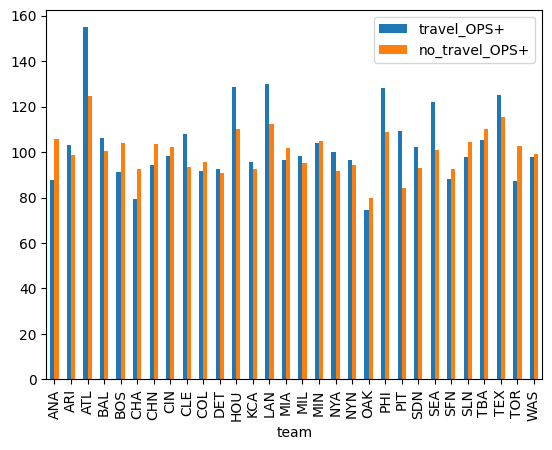

In [ ]:
nogap_splits_offense.loc[nogap_splits_offense['season']=='2023'][['team', 'travel_OPS+','no_travel_OPS+']].plot(kind='bar', x='team')

In [ ]:
nogap_splits_offense['percent_difference']= (nogap_splits_offense['no_travel_OPS+']-nogap_splits_offense['travel_OPS+'])/((nogap_splits_offense['no_travel_OPS+']+nogap_splits_offense['travel_OPS+'])/2)

In [ ]:
mean_nogap_off=nogap_splits_offense[['percent_difference','season']].groupby('season').mean()

In [ ]:
mean_nogap_off

,percent_difference
season,
2000,0.036361
2001,-0.003941
2002,-0.038608
2003,-0.044560
2004,-0.024429
2005,-0.003677
2006,-0.021972
2007,-0.035302
2008,-0.015943


In [ ]:
nogap_splits_offense=nogap_splits_offense.merge(right=team_avg_OPS,left_on=['team','season'], right_on=['away_team','season'])

In [ ]:
nogap_splits_offense

,team,season,away_gap_x,home_gap_x,travel_SLG,travel_OBP,lgSLG_x,lgOPB_x,travel_OPS+,away_gap_y,home_gap_y,no_travel_SLG,no_travel_OBP,lgSLG_y,lgOPB_y,no_travel_OPS+,percent_difference,away_team,team_OPS+
0,ANA,2000,False,False,0.489164,0.364068,0.376971,0.334523,138.593559,False,False,0.402806,0.341085,0.376971,0.334523,108.814753,-0.240726,ANA,111.838934
1,ANA,2001,False,False,0.347545,0.329011,0.371905,0.322072,95.604463,False,False,0.352578,0.314156,0.371905,0.322072,92.345329,-0.034681,ANA,93.714341
2,ANA,2002,False,False,0.452643,0.347983,0.362104,0.320848,133.460904,False,False,0.378396,0.330143,0.362104,0.320848,107.396150,-0.216433,ANA,107.710667
3,ANA,2003,False,False,0.345131,0.323925,0.368136,0.322549,94.177498,False,False,0.356612,0.319530,0.368136,0.322549,95.933727,0.018476,ANA,97.846827
4,ANA,2004,False,False,0.500903,0.403920,0.372403,0.324726,158.893642,False,False,0.361098,0.320678,0.372403,0.324726,95.717865,-0.496252,ANA,103.963720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,WAS,2019,False,False,0.432416,0.367820,0.380132,0.313693,131.008879,False,False,0.397334,0.339300,0.380132,0.313693,112.688193,-0.150356,WAS,108.056772
716,WAS,2020,False,False,0.439262,0.389333,0.362228,0.313510,145.452105,False,False,0.367243,0.325571,0.362228,0.313510,105.231853,-0.320884,WAS,108.020758
717,WAS,2021,False,False,0.389769,0.314895,0.357972,0.308161,111.067452,False,False,0.358886,0.330435,0.357972,0.308161,107.483375,-0.032799,WAS,106.376989
718,WAS,2022,False,False,0.348444,0.300253,0.346590,0.303564,99.444635,False,False,0.336569,0.303770,0.346590,0.303564,97.176701,-0.023069,WAS,96.379974


## Defensive Travel Splits

In [ ]:
away_def_travel=df_location[['away_did_travel','away_team', 'home_pa', 'season']].groupby(['away_did_travel', 'away_team','season'], as_index=False).sum()
home_def_travel=df_location[['home_did_travel','home_team', 'away_pa', 'season']].groupby(['home_did_travel', 'home_team','season'], as_index=False).sum()

In [ ]:
away_def_travel_stats=df_location[['away_did_travel','away_team', 'home_SLG','home_OBP', 'season']].groupby(['away_did_travel', 'away_team','season'], as_index=False).mean()
home_def_travel_stats=df_location[['home_did_travel','home_team', 'away_SLG', 'away_OBP', 'season']].groupby(['home_did_travel', 'home_team','season'], as_index=False).mean()

In [ ]:
def_travel=away_def_travel.merge(right=home_def_travel,how='outer', right_on=['home_team','home_did_travel', 'season'], left_on=['away_team','away_did_travel', 'season'])

In [ ]:
def_travel=def_travel.merge(right=away_def_travel_stats, how='outer', on=['season', 'away_did_travel', 'away_team'])

In [ ]:
def_travel=def_travel.merge(right=home_def_travel_stats, how='outer', on=['season', 'home_did_travel', 'home_team'])


In [ ]:
def_travel['allowed_SLG']=((def_travel['home_SLG']*def_travel['home_pa'])+(def_travel['away_SLG']*def_travel['away_pa']))/(def_travel['home_pa']+def_travel['away_pa'])
def_travel['allowed_OBP']=((def_travel['home_OBP']*def_travel['home_pa'])+(def_travel['away_OBP']*def_travel['away_pa']))/(def_travel['home_pa']+def_travel['away_pa'])


In [ ]:
def_travel.drop_duplicates(keep='first', inplace=True)

In [ ]:
def_travel=def_travel.merge(right=pitch_merge_prep,how='outer', on=['away_team','season'])

In [ ]:
def_travel['allowed_OPS+']=100*((def_travel['allowed_OBP']/def_travel['lgOPB'])+(def_travel['allowed_SLG']/def_travel['lgSLG'])-1)

In [ ]:
def_travel.drop_duplicates(keep='first', inplace=True)

In [ ]:
def_did_trav = def_travel.loc[def_travel['away_did_travel']==0]
def_no_trav = def_travel.loc[def_travel['away_did_travel']==1]

In [ ]:
def_did_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)
def_no_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-853-cb7b45672a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_did_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)
<ipython-input-853-cb7b45672a9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_no_trav.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
def_did_trav.rename(columns={'away_team':'team','allowed_SLG':'no_travel_allowed_SLG','allowed_OBP':'no_travel_allowed_OBP','allowed_OPS+':'no_travel_allowed_OPS+'},inplace=True)
def_no_trav.rename(columns={'away_team':'team','allowed_SLG':'travel_allowed_SLG','allowed_OBP':'travel_allowed_OBP','allowed_OPS+':'travel_allowed_OPS+'},inplace=True)


<ipython-input-854-15d3be86b7a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_did_trav.rename(columns={'away_team':'team','allowed_SLG':'no_travel_allowed_SLG','allowed_OBP':'no_travel_allowed_OBP','allowed_OPS+':'no_travel_allowed_OPS+'},inplace=True)
<ipython-input-854-15d3be86b7a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_no_trav.rename(columns={'away_team':'team','allowed_SLG':'travel_allowed_SLG','allowed_OBP':'travel_allowed_OBP','allowed_OPS+':'travel_allowed_OPS+'},inplace=True)


In [ ]:
travel_splits_defense = def_no_trav.merge(right=def_did_trav, on=['team','season'],how='outer')

In [ ]:
travel_splits_defense.drop(columns=['away_did_travel_x','away_did_travel_y'],inplace=True)

In [ ]:
travel_splits_defense

,team,season,travel_allowed_SLG,travel_allowed_OBP,lgSLG_x,lgOPB_x,travel_allowed_OPS+,no_travel_allowed_SLG,no_travel_allowed_OBP,lgSLG_y,lgOPB_y,no_travel_allowed_OPS+
0,ANA,2000,0.349894,0.329709,0.376971,0.334523,91.377950,0.395556,0.342742,0.376971,0.334523,107.386811
1,ANA,2001,0.379498,0.312850,0.371905,0.322072,99.178538,0.360069,0.325257,0.371905,0.322072,97.806556
2,ANA,2002,0.346312,0.307469,0.362104,0.320848,91.468915,0.344752,0.305330,0.362104,0.320848,90.371275
3,ANA,2003,0.423017,0.339371,0.368136,0.322549,120.123106,0.361875,0.314719,0.368136,0.322549,95.871677
4,ANA,2004,0.358484,0.325630,0.372403,0.324726,96.541104,0.365179,0.313920,0.372403,0.324726,94.732855
...,...,...,...,...,...,...,...,...,...,...,...,...
715,WAS,2019,0.332816,0.286717,0.380132,0.313693,78.953296,0.362836,0.307664,0.380132,0.313693,93.527954
716,WAS,2020,0.407479,0.346625,0.362228,0.313510,123.055242,0.405582,0.334851,0.362228,0.313510,118.776030
717,WAS,2021,0.376610,0.305345,0.357972,0.308161,104.292534,0.388669,0.320808,0.357972,0.308161,112.679390
718,WAS,2022,0.393430,0.342711,0.346590,0.303564,126.410539,0.397558,0.331203,0.346590,0.303564,123.810597


## Defensive NoGap Splits

In [ ]:
away_def_travelgap=df_location[['away_did_travel','away_team', 'home_pa', 'season', 'away_gap']].groupby(['away_did_travel', 'away_team','season', 'away_gap'], as_index=False).sum()
home_def_travelgap=df_location[['home_did_travel','home_team', 'away_pa', 'season', 'home_gap']].groupby(['home_did_travel', 'home_team','season',  'home_gap'], as_index=False).sum()

In [ ]:
away_def_travelgap_stats=df_location[['away_did_travel','away_team', 'home_SLG','home_OBP', 'season','away_gap']].groupby(['away_did_travel', 'away_team','season','away_gap'], as_index=False).mean()
home_def_travelgap_stats=df_location[['home_did_travel','home_team', 'away_SLG', 'away_OBP', 'season','home_gap']].groupby(['home_did_travel', 'home_team','season','home_gap'], as_index=False).mean()

In [ ]:
def_travelgap=away_def_travelgap.merge(right=home_def_travelgap,how='outer', right_on=['home_team','home_did_travel', 'season', 'home_gap'], left_on=['away_team','away_did_travel', 'season', 'away_gap'])

In [ ]:
def_travelgap=def_travelgap.merge(right=away_def_travelgap_stats, how='outer', on=['season', 'away_did_travel', 'away_team','away_gap'])

In [ ]:
def_travelgap=def_travelgap.merge(right=home_def_travelgap_stats, how='outer', on=['season', 'home_did_travel', 'home_team','home_gap'])


In [ ]:
def_travelgap=def_travelgap.loc[def_travelgap['away_did_travel']==1]

In [ ]:
def_travelgap

,away_did_travel,away_team,season,away_gap,home_pa,home_did_travel,home_team,home_gap,away_pa,home_SLG,home_OBP,away_SLG,away_OBP
1439,1.0,ANA,2000,False,290.0,1.0,ANA,False,295.0,0.402166,0.363471,0.321099,0.302104
1440,1.0,ANA,2000,True,268.0,1.0,ANA,True,79.0,0.341420,0.328376,0.301713,0.319170
1441,1.0,ANA,2001,False,222.0,1.0,ANA,False,293.0,0.226010,0.242197,0.446158,0.356860
1442,1.0,ANA,2001,True,175.0,1.0,ANA,True,119.0,0.390696,0.318746,0.476520,0.325338
1443,1.0,ANA,2002,False,267.0,1.0,ANA,False,347.0,0.348319,0.301698,0.319509,0.310464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,1.0,WAS,2021,True,320.0,1.0,WAS,True,116.0,0.388255,0.313549,0.268787,0.268937
2873,1.0,WAS,2022,False,164.0,1.0,WAS,False,195.0,0.432319,0.374423,0.361854,0.329675
2874,1.0,WAS,2022,True,188.0,1.0,WAS,True,318.0,0.473063,0.366660,0.347089,0.319826
2875,1.0,WAS,2023,False,337.0,1.0,WAS,False,239.0,0.384557,0.322556,0.391115,0.344168


In [ ]:
def_travelgap['allowed_SLG']=((def_travelgap['home_SLG']*def_travelgap['home_pa'])+(def_travelgap['away_SLG']*def_travelgap['away_pa']))/(def_travelgap['home_pa']+def_travelgap['away_pa'])
def_travelgap['allowed_OBP']=((def_travelgap['home_OBP']*def_travelgap['home_pa'])+(def_travelgap['away_OBP']*def_travelgap['away_pa']))/(def_travelgap['home_pa']+def_travelgap['away_pa'])


In [ ]:
def_travelgap.drop_duplicates(keep='first', inplace=True)

In [ ]:
def_travelgap=def_travelgap.merge(right=pitch_merge_prep,how='outer', on=['away_team','season'])

In [ ]:
def_travelgap['allowed_OPS+']=100*((def_travelgap['allowed_OBP']/def_travelgap['lgOPB'])+(def_travelgap['allowed_SLG']/def_travelgap['lgSLG'])-1)

In [ ]:
def_travelgap.drop_duplicates(keep='first', inplace=True)

In [ ]:
def_did_travgap = def_travelgap.loc[def_travelgap['away_gap']==False]
def_no_travgap = def_travelgap.loc[def_travelgap['away_gap']==True]

In [ ]:
def_did_travgap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)
def_no_travgap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-911-aac192f5f29d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_did_travgap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)
<ipython-input-911-aac192f5f29d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_no_travgap.drop(columns=['away_pa','home_pa', 'home_did_travel', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
def_did_travgap.rename(columns={'away_team':'team','allowed_SLG':'no_gap_allowed_SLG','allowed_OBP':'no_gap_allowed_OBP','allowed_OPS+':'no_gap_allowed_OPS+'},inplace=True)
def_no_travgap.rename(columns={'away_team':'team','allowed_SLG':'gap_allowed_SLG','allowed_OBP':'gap_allowed_OBP','allowed_OPS+':'gap_allowed_OPS+'},inplace=True)


<ipython-input-912-56b576d52ef8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_did_travgap.rename(columns={'away_team':'team','allowed_SLG':'no_gap_allowed_SLG','allowed_OBP':'no_gap_allowed_OBP','allowed_OPS+':'no_gap_allowed_OPS+'},inplace=True)
<ipython-input-912-56b576d52ef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_no_travgap.rename(columns={'away_team':'team','allowed_SLG':'gap_allowed_SLG','allowed_OBP':'gap_allowed_OBP','allowed_OPS+':'gap_allowed_OPS+'},inplace=True)


In [ ]:
travelgap_splits_defense = def_no_travgap.merge(right=def_did_travgap, on=['team','season'],how='outer')

In [ ]:
travelgap_splits_defense.drop(columns=['away_did_travel_x','away_did_travel_y'],inplace=True)

In [ ]:
travelgap_splits_defense

,team,season,away_gap_x,home_gap_x,gap_allowed_SLG,gap_allowed_OBP,lgSLG_x,lgOPB_x,gap_allowed_OPS+,away_gap_y,home_gap_y,no_gap_allowed_SLG,no_gap_allowed_OBP,lgSLG_y,lgOPB_y,no_gap_allowed_OPS+
0,ANA,2000,True,True,0.332380,0.326280,0.376971,0.334523,85.707140,False,False,0.361286,0.332525,0.376971,0.334523,95.241631
1,ANA,2001,True,True,0.425434,0.321414,0.371905,0.322072,114.189139,False,False,0.351259,0.307432,0.371905,0.322072,89.903140
2,ANA,2002,True,True,0.372880,0.309286,0.362104,0.320848,99.372157,False,False,0.332037,0.306652,0.362104,0.320848,87.272092
3,ANA,2003,True,True,0.419376,0.337810,0.368136,0.322549,118.650187,False,False,0.426466,0.341210,0.368136,0.322549,121.630108
4,ANA,2004,True,True,0.354007,0.323438,0.372403,0.324726,94.663807,False,False,0.364036,0.327689,0.372403,0.324726,98.665912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,WAS,2021,True,True,0.356470,0.301680,0.357972,0.308161,97.477232,False,False,0.391875,0.308115,0.357972,0.308161,109.456018
716,WAS,2022,True,True,0.393893,0.337227,0.346590,0.303564,124.737724,False,False,0.394044,0.350117,0.346590,0.303564,129.027550
717,WAS,2023,True,True,0.371434,0.337356,0.361539,0.311594,111.004547,False,False,0.387278,0.331524,0.361539,0.311594,113.515171
718,MIN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.275609,0.301429,0.362228,0.313510,72.233753


## Calculating Time Zone Differences for each game

In [ ]:
df_location['city'].unique()

array(['Tokyo', 'New York', 'St. Louis', 'Cincinnati', 'Montreal',
       'Houston', 'Denver', 'San Francisco', 'Chicago', 'Atlanta',
       'Miami', 'Pittsburgh', 'Milwaukee', 'Minneapolis', 'Kansas City',
       'Philadelphia', 'San Diego', 'Los Angeles', 'Phoenix', 'Boston',
       'Toronto', 'Seattle', 'Anaheim', 'Oakland', 'Arlington',
       'Cleveland', 'Detroit', 'St. Petersburg', 'Baltimore', 'San Juan',
       'Washington', 'Lake Buena Vista', 'Sydney', 'Fort Bragg',
       'Williamsport', 'Monterrey', 'Omaha', 'London', 'Buffalo',
       'Dyersville', 'Dunedin'], dtype=object)

In [ ]:
def city_tz(data):
  if data['city'] == 'Tokyo':
    return 'JST'
  elif data['city'] == 'New York':
    return 'EST'
  elif data['city'] == 'St. Louis':
    return 'CST'
  elif data['city'] == 'Cincinnati':
    return 'EST'
  elif data['city'] == 'Montreal':
    return 'EST'
  elif data['city'] == 'Houston':
    return 'CST'
  elif data['city'] == 'Denver':
    return 'MST'
  elif data['city'] == 'San Francisco':
    return 'PST'
  elif data['city'] == 'Chicago':
    return 'CST'
  elif data['city'] == 'Atlanta':
    return 'EST'
  elif data['city'] == 'Miami':
    return 'EST'
  elif data['city'] == 'Pittsburgh':
    return 'EST'
  elif data['city'] == 'Milwaukee':
    return 'CST'
  elif data['city'] == 'Minneapolis':
    return 'CST'
  elif data['city'] == 'Kansas City':
    return 'CST'
  elif data['city'] == 'Philadelphia':
    return 'EST'
  elif data['city'] == 'San Diego':
    return 'PST'
  elif data['city'] == 'Los Angeles':
    return 'PST'
  elif data['city'] == 'Phoenix':
    return 'MST'
  elif data['city'] == 'Boston':
    return 'EST'
  elif data['city'] == 'Toronto':
    return 'EST'
  elif data['city'] == 'Seattle':
    return 'PST'
  elif data['city'] == 'Anaheim':
    return 'PST'
  elif data['city'] == 'Oakland':
    return 'PST'
  elif data['city'] == 'Arlington':
    return 'CST'
  elif data['city'] == 'Cleveland':
    return 'EST'
  elif data['city'] == 'Detroit':
    return 'EST'
  elif data['city'] == 'St. Petersburg':
    return 'EST'
  elif data['city'] == 'Baltimore':
    return 'EST'
  elif data['city'] == 'San Juan':
    return 'AST'
  elif data['city'] == 'Washington':
    return 'EST'
  elif data['city'] == 'Lake Beuna Vista':
    return 'EST'
  elif data['city'] == 'Sydney':
    return 'AEDT'
  elif data['city'] == 'Fort Bragg':
    return 'PST'
  elif data['city'] == 'Williamsport':
    return 'EST'
  elif data['city'] == 'Monterrey':
    return 'CST'
  elif data['city'] == 'Omaha':
    return 'CST'
  elif data['city'] == 'London':
    return 'GMT'
  elif data['city'] == 'Buffalo':
    return 'EST'
  elif data['city'] == 'Dyersville':
    return 'CST'
  elif data['city'] == 'Dunedin':
    return 'NZDT'




In [ ]:
df_location['game_tz']=df_location.apply(city_tz,axis=1)

In [ ]:
df_location['game_tz']=df_location['game_tz'].replace({'GMT':1, 'AST':5,'EST':6,'CST':7,'MST':8,'PST':9,'NZDT':13,'AEDT':15,'JST':16})

In [ ]:
from datetime import datetime
df_location['game_date']=pd.to_datetime(df_location['game_date'],format='%Y%m%d')

In [ ]:
df_location.sort_values(by='game_date')

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,home_OBP,away_OBP,home_AVG,away_AVG,home_SLG,away_SLG,home_OPS,away_OPS,season,lgOPB,lgSLG,home_OPS+,away_OPS+,away_team_season_SLG,away_team_season_OBP,home_team_season_SLG,home_team_season_OBP,home_team_season_OPS+,away_team_season_OPS+,home_won,away_won,away_distance,away_longitude,away_gap,home_distance,home_longitude,home_gap,away_did_travel,home_did_travel,game_tz
0,0,2000-03-29,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0,0.263158,0.511111,0.184211,0.266667,0.289474,0.422222,0.552632,0.933333,2000,0.334523,0.376971,55.455850,164.791705,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,0,1,0,0.0,True,0,0.0,True,0,0,16.0
1487,1,2000-03-30,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0,0.250000,0.312500,0.113636,0.125000,0.113636,0.229167,0.363636,0.541667,2000,0.334523,0.376971,4.877777,54.208054,0.364148,0.334958,0.351920,0.323658,90.106367,96.728346,0,1,0,0.0,False,0,0.0,False,0,0,16.0
2085,12,2000-04-03,TEX,CHA,True,10,4,ARL02,Rangers Ballpark in Arlington,Arlington,TX,36,9,1,0,0,23,1,2,0,40,6,1,0,4,17,6,4,2,0.425000,0.333333,0.275000,0.277778,0.600000,0.305556,1.025000,0.638889,2000,0.334523,0.376971,186.209760,80.699667,0.405218,0.343764,0.390402,0.342123,105.834430,110.255432,1,0,0,0.0,True,0,0.0,True,0,0,7.0
87,7,2000-04-03,SLN,CHN,True,7,1,STL09,Busch Stadium II,St. Louis,MO,32,2,1,0,0,18,7,3,1,41,5,1,1,3,18,6,7,0,0.414634,0.218750,0.243902,0.093750,0.536585,0.125000,0.951220,0.343750,2000,0.334523,0.376971,166.288928,-1.449418,0.351920,0.323658,0.384040,0.344524,104.864564,90.106367,1,0,0,0.0,True,0,0.0,True,0,0,7.0
2396,9,2000-04-03,BAL,CLE,True,1,4,BAL12,Oriole Park at Camden Yards,Baltimore,MD,35,4,0,0,2,20,7,2,0,37,4,2,0,0,16,8,7,0,0.351351,0.228571,0.162162,0.171429,0.216216,0.342857,0.567568,0.571429,2000,0.334523,0.376971,62.386605,59.277965,0.404580,0.357295,0.378202,0.331024,99.280288,114.131055,0,1,0,0.0,True,0,0.0,True,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55898,56760,2023-10-01,ARI,HOU,True,1,8,PHO01,Chase Field,Phoenix,AZ,40,4,1,2,2,19,9,3,0,35,4,2,0,0,20,6,3,0,0.257143,0.300000,0.171429,0.225000,0.228571,0.500000,0.485714,0.800000,2023,0.311594,0.361539,45.746631,134.576559,0.377007,0.320645,0.356825,0.313296,99.242169,107.182777,0,1,0,0.0,True,0,0.0,True,0,0,8.0
56772,56764,2023-10-01,NYN,PHI,True,1,9,NYC20,Citi Field,New York,NY,42,8,1,1,2,19,7,4,0,30,1,0,0,1,18,8,2,0,0.133333,0.380952,0.066667,0.285714,0.166667,0.500000,0.300000,0.880952,2023,0.311594,0.361539,-11.110138,160.556629,0.382111,0.318367,0.350961,0.306625,95.479410,107.863461,0,1,0,0.0,True,0,0.0,True,0,0,6.0
57991,56768,2023-10-01,ANA,OAK,True,7,3,ANA01,Angel Stadium of Anaheim,Anaheim,CA,38,7,2,0,1,18,6,4,0,41,5,2,0,3,13,10,6,2,0.439024,0.368421,0.243902,0.263158,0.512195,0.394737,0.951220,0.763158,2023,0.311594,0.361539,182.566804,127.419688,0.319082,0.288312,0.372495,0.309212,102.265882,80.784534,1,0,0,0.0,True,0,0.0,True,0,0,9.0
56437,56774,2023-10-01,TOR,TBA,True,8,12,TOR02,Rogers Centre,Toronto,ONT,47,9,4,0,3,18,9,3,1,45,7,2,2,1,21,7,3,2,0.377778,0.425532,0.266667,0.340426,0.466667,0.617021,0.844444,1.042553,2023,0.311594,0.361539,150.317971,207.231046,0.390319,0.323819,0.364868,0.320677,103.835476,111.883574,0,1,0,0.0,True,0,0.0,True,0,0,6.0


In [ ]:
df_location.to_csv('fixed_data.csv', encoding = 'utf-8-sig')
files.download('fixed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_location

,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,home_OBP,away_OBP,home_AVG,away_AVG,home_SLG,away_SLG,home_OPS,away_OPS,season,lgOPB,lgSLG,home_OPS+,away_OPS+,away_team_season_SLG,away_team_season_OBP,home_team_season_SLG,home_team_season_OBP,home_team_season_OPS+,away_team_season_OPS+,home_won,away_won,away_distance,away_longitude,away_gap,home_distance,home_longitude,home_gap,away_did_travel,home_did_travel,game_tz
0,0,2000-03-29,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0,0.263158,0.511111,0.184211,0.266667,0.289474,0.422222,0.552632,0.933333,2000,0.334523,0.376971,55.455850,164.791705,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,0,1,0,0.0000,True,0,0.0000,True,0,0,16.0
1,251,2000-04-22,NYN,CHN,True,8,3,NYC17,Shea Stadium,New York,NY,36,5,1,0,2,22,5,1,0,41,9,3,0,0,19,3,6,1,0.463415,0.250000,0.292683,0.222222,0.365854,0.416667,0.829268,0.666667,2000,0.334523,0.376971,135.580650,85.263281,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,1,0,536769,-0.3632,True,0,0.0000,True,1,0,6.0
3,252,2000-04-22,NYN,CHN,True,7,6,NYC17,Shea Stadium,New York,NY,42,6,4,0,1,21,5,4,1,37,6,3,0,1,14,6,7,0,0.459459,0.380952,0.270270,0.261905,0.432432,0.428571,0.891892,0.809524,2000,0.334523,0.376971,152.059813,127.567252,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,1,0,536769,-0.3632,True,0,0.0000,True,1,0,6.0
5,266,2000-04-23,NYN,CHN,True,15,8,NYC17,Shea Stadium,New York,NY,42,4,4,0,2,24,4,4,0,45,11,4,0,3,16,9,2,0,0.444444,0.333333,0.400000,0.238095,0.688889,0.476190,1.133333,0.809524,2000,0.334523,0.376971,215.602091,125.964361,0.351920,0.323658,0.364148,0.334958,96.728346,90.106367,1,0,0,0.0000,False,0,0.0000,False,0,0,6.0
6,563,2000-05-16,NYN,COL,False,3,4,NYC17,Shea Stadium,New York,NY,44,6,2,0,1,17,14,4,0,44,6,4,0,2,22,7,3,0,0.340909,0.295455,0.272727,0.204545,0.500000,0.318182,0.840909,0.613636,2000,0.334523,0.376971,134.545008,72.725849,0.390540,0.349814,0.364148,0.334958,96.728346,108.170283,0,1,0,0.0000,True,2618935,30.9509,True,0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58232,55028,2023-05-20,HOU,OAK,True,3,2,HOU03,Minute Maid Park,Houston,TX,34,6,1,0,0,15,11,1,0,33,4,2,0,1,16,8,2,0,0.272727,0.235294,0.212121,0.205882,0.363636,0.235294,0.636364,0.470588,2023,0.311594,0.361539,88.106422,40.594171,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,1,0,0,0.0000,False,0,0.0000,False,0,0,7.0
58233,55044,2023-05-21,HOU,OAK,True,2,0,HOU03,Minute Maid Park,Houston,TX,30,3,1,0,0,19,7,0,0,34,3,2,0,0,14,7,8,0,0.382353,0.133333,0.147059,0.133333,0.205882,0.166667,0.588235,0.300000,2023,0.311594,0.361539,79.654654,-11.110138,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,1,0,0,0.0000,False,0,0.0000,False,0,0,7.0
58234,56500,2023-09-11,HOU,OAK,False,0,4,HOU03,Minute Maid Park,Houston,TX,34,3,1,0,3,13,13,1,0,32,3,0,0,0,20,6,2,1,0.187500,0.235294,0.093750,0.205882,0.093750,0.500000,0.281250,0.735294,2023,0.311594,0.361539,-13.894797,113.810483,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,0,1,0,0.0000,False,364024,1.7365,False,0,1,7.0
58235,56517,2023-09-12,HOU,OAK,False,2,6,HOU03,Minute Maid Park,Houston,TX,38,4,4,0,2,20,7,0,1,34,4,2,0,0,18,8,2,0,0.235294,0.289474,0.176471,0.263158,0.235294,0.526316,0.470588,0.815789,2023,0.311594,0.361539,40.594171,138.477160,0.319082,0.288312,0.377007,0.320645,107.182777,80.784534,0,1,0,0.0000,False,0,0.0000,False,0,0,7.0


## Home/Away Defense

In [ ]:
awayd_pa=df[['away_team','season','home_pa']].groupby(['away_team', 'season'], as_index=False).sum()

In [ ]:
homed_pa=df[['home_team','season','away_pa']].groupby(['home_team', 'season'], as_index=False).sum()

In [ ]:
away_statsd=df[['away_team','home_OBP','home_SLG', 'season']].groupby(['away_team', 'season'], as_index=False).mean()

In [ ]:
home_statsd=df[['home_team','away_OBP','away_SLG', 'season']].groupby(['home_team', 'season'], as_index=False).mean()

In [ ]:
teamdef = awayd_pa.merge(right=homed_pa, right_on=['home_team', 'season'], left_on=['away_team', 'season'], how='outer')

In [ ]:
teamdef = teamdef.merge(right=away_statsd, on=['season', 'away_team'], how='outer')

In [ ]:
teamdef = teamdef.merge(right=home_statsd, on=['season', 'home_team'], how='outer')

In [ ]:
teamdef['allowed_SLG']=((teamdef['home_SLG']*teamdef['home_pa'])+teamdef['away_SLG']*teamdef['away_pa'])/(teamdef['home_pa']+teamdef['away_pa'])
teamdef['allowed_OBP']=((teamdef['home_OBP']*teamdef['home_pa'])+teamdef['away_OBP']*teamdef['away_pa'])/(teamdef['home_pa']+teamdef['away_pa'])

In [ ]:
teamdef=teamdef.merge(right=team_merge_prep, on=['season', 'away_team'], how='outer')

In [ ]:
teamdef.drop_duplicates(keep='first', inplace=True)

In [ ]:
teamdef['allowed_OPS+']=100*((teamdef['allowed_OBP']/teamdef['lgOPB'])+(teamdef['allowed_SLG']/teamdef['lgSLG'])-1)

In [ ]:
teamdef.drop(columns='away_team_season_OPS+', inplace=True)

In [ ]:
teamdef['allowed_home_OPS+']=100*((teamdef['home_OBP']/teamdef['lgOPB'])+(teamdef['home_SLG']/teamdef['lgSLG'])-1)
teamdef['allowed_away_OPS+']=100*((teamdef['away_OBP']/teamdef['lgOPB'])+(teamdef['away_SLG']/teamdef['lgSLG'])-1)

In [ ]:
teamdef

,away_team,season,home_pa,home_team,away_pa,home_OBP,home_SLG,away_OBP,away_SLG,allowed_SLG,allowed_OBP,lgSLG,lgOPB,allowed_OPS+,allowed_home_OPS+,allowed_away_OPS+
0,ANA,2000,3149,ANA,3251,0.343146,0.389898,0.338285,0.387365,0.388612,0.340677,0.376971,0.334523,104.927309,106.006730,103.881756
81,ANA,2001,2985,ANA,3209,0.320470,0.355838,0.326333,0.368248,0.362267,0.323507,0.371905,0.322072,97.854248,95.182366,100.339624
162,ANA,2002,2976,ANA,3121,0.308039,0.364002,0.303393,0.326870,0.344994,0.305661,0.362104,0.320848,90.541658,96.531962,84.829661
243,ANA,2003,2980,ANA,3181,0.322238,0.388634,0.314363,0.353455,0.370471,0.318172,0.368136,0.322549,99.277116,105.471531,93.474112
323,ANA,2004,3005,ANA,3240,0.315429,0.362022,0.315111,0.366512,0.364352,0.315264,0.372403,0.324726,94.924284,94.349444,95.457430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56424,WAS,2019,2967,WAS,3166,0.304124,0.344356,0.305336,0.372020,0.358636,0.304749,0.380132,0.313693,91.494183,87.537922,95.201773
56505,WAS,2020,1014,WAS,1259,0.352802,0.438002,0.323844,0.380032,0.405893,0.336763,0.362228,0.313510,119.471574,133.452116,108.211630
56532,WAS,2021,3027,WAS,3042,0.329943,0.395991,0.306561,0.377416,0.386681,0.318223,0.357972,0.308161,111.285069,117.689267,104.912451
56613,WAS,2022,3009,WAS,3210,0.341120,0.406619,0.325210,0.388242,0.397134,0.332908,0.346590,0.303564,124.249862,129.691853,119.148631


## TZ change merger


In [ ]:
df_tz=pd.read_csv(io.BytesIO(uploaded['timezones (1).csv']))


In [ ]:
df_final=df_location.merge(right=df_tz, right_on='id',left_on='Unnamed: 0', how='outer')

In [ ]:
df_final['home_did_tz']=(df_final['home_tz_diff']!=0)*1
df_final['away_did_tz']=(df_final['away_tz_diff']!=0)*1

In [ ]:
df_final

## TZ offense splits

In [ ]:
away_tz=df_final[['away_did_tz','away_team', 'away_pa', 'season']].groupby(['away_did_tz', 'away_team','season'], as_index=False).sum()
home_tz=df_final[['home_did_tz','home_team', 'home_pa', 'season']].groupby(['home_did_tz', 'home_team','season'], as_index=False).sum()

In [ ]:
away_tz_stats=df_final[['away_did_tz','away_team', 'away_SLG','away_OBP', 'season']].groupby(['away_did_tz', 'away_team','season'], as_index=False).mean()
home_tz_stats=df_final[['home_did_tz','home_team', 'home_SLG', 'home_OBP', 'season']].groupby(['home_did_tz', 'home_team','season'], as_index=False).mean()

In [ ]:
tz=away_tz.merge(right=home_tz,how='outer', right_on=['home_team','home_did_tz', 'season'], left_on=['away_team','away_did_tz', 'season'])

In [ ]:
tz=tz.merge(right=away_tz_stats, how='outer', on=['season', 'away_did_tz', 'away_team'])

In [ ]:
tz=tz.merge(right=home_tz_stats, how='outer', on=['season', 'home_did_tz', 'home_team'])

In [ ]:
tz['team_SLG']=((tz['home_SLG']*tz['home_pa'])+(tz['away_SLG']*tz['away_pa']))/(tz['home_pa']+tz['away_pa'])
tz['team_OBP']=((tz['home_OBP']*tz['home_pa'])+(tz['away_OBP']*tz['away_pa']))/(tz['home_pa']+tz['away_pa'])

In [ ]:
tz.drop_duplicates(keep='first', inplace=True)

In [ ]:
pitch_merge_prep

,season,away_team,lgSLG,lgOPB
0,2000,CHN,0.376971,0.334523
1,2000,CHN,0.376971,0.334523
2,2000,CHN,0.376971,0.334523
3,2000,CHN,0.376971,0.334523
4,2000,COL,0.376971,0.334523
...,...,...,...,...
56770,2023,OAK,0.361539,0.311594
56771,2023,OAK,0.361539,0.311594
56772,2023,OAK,0.361539,0.311594
56773,2023,OAK,0.361539,0.311594


In [ ]:
tz=tz.merge(right=pitch_merge_prep,how='outer', on=['away_team','season'])

In [ ]:
tz['team_OPS+']=100*((tz['team_OBP']/tz['lgOPB'])+(tz['team_SLG']/tz['lgSLG'])-1)

In [ ]:
tz.drop_duplicates(keep='first', inplace=True)

In [ ]:
did_tz = tz.loc[tz['away_did_tz']==0]
no_tz = tz.loc[tz['away_did_tz']==1]

In [ ]:
did_tz.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-979-9b17c9ef26ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_tz.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
no_tz.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-980-2a0dcd18eec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_tz.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
did_tz.rename(columns={'away_team':'team','team_SLG':'no_tz_SLG','team_OBP':'no_tz_OBP','team_OPS+':'no_tz_OPS+'},inplace=True)

<ipython-input-981-01a4e6111285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_tz.rename(columns={'away_team':'team','team_SLG':'no_tz_SLG','team_OBP':'no_tz_OBP','team_OPS+':'no_tz_OPS+'},inplace=True)


In [ ]:
no_tz.rename(columns={'away_team':'team','team_SLG':'tz_SLG','team_OBP':'tz_OBP','team_OPS+':'tz_OPS+'},inplace=True)

<ipython-input-982-0acc441cb2e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_tz.rename(columns={'away_team':'team','team_SLG':'tz_SLG','team_OBP':'tz_OBP','team_OPS+':'tz_OPS+'},inplace=True)


In [ ]:
tz_splits_offense = no_tz.merge(right=did_tz, on=['team','season'],how='outer')

In [ ]:
tz_splits_offense.drop(columns=['away_did_tz_x','away_did_tz_y'],inplace=True)

## TZ Defense

In [ ]:
away_tzd=df_final[['away_did_tz','away_team', 'home_pa', 'season']].groupby(['away_did_tz', 'away_team','season'], as_index=False).sum()
home_tzd=df_final[['home_did_tz','home_team', 'away_pa', 'season']].groupby(['home_did_tz', 'home_team','season'], as_index=False).sum()

In [ ]:
away_tzd_stats=df_final[['away_did_tz','away_team', 'home_SLG','home_OBP', 'season']].groupby(['away_did_tz', 'away_team','season'], as_index=False).mean()
home_tzd_stats=df_final[['home_did_tz','home_team', 'away_SLG', 'away_OBP', 'season']].groupby(['home_did_tz', 'home_team','season'], as_index=False).mean()

In [ ]:
tzd=away_tzd.merge(right=home_tzd,how='outer', right_on=['home_team','home_did_tz', 'season'], left_on=['away_team','away_did_tz', 'season'])

In [ ]:
tzd=tzd.merge(right=away_tzd_stats, how='outer', on=['season', 'away_did_tz', 'away_team'])

In [ ]:
tzd=tzd.merge(right=home_tzd_stats, how='outer', on=['season', 'home_did_tz', 'home_team'])

In [ ]:
tzd['allowed_SLG']=((tzd['home_SLG']*tzd['home_pa'])+(tzd['away_SLG']*tzd['away_pa']))/(tzd['home_pa']+tzd['away_pa'])
tzd['allowed_OBP']=((tzd['home_OBP']*tzd['home_pa'])+(tzd['away_OBP']*tzd['away_pa']))/(tzd['home_pa']+tzd['away_pa'])

In [ ]:
tzd.drop_duplicates(keep='first', inplace=True)

In [ ]:
pitch_merge_prep

,season,away_team,lgSLG,lgOPB
0,2000,CHN,0.376971,0.334523
1,2000,CHN,0.376971,0.334523
2,2000,CHN,0.376971,0.334523
3,2000,CHN,0.376971,0.334523
4,2000,COL,0.376971,0.334523
...,...,...,...,...
56770,2023,OAK,0.361539,0.311594
56771,2023,OAK,0.361539,0.311594
56772,2023,OAK,0.361539,0.311594
56773,2023,OAK,0.361539,0.311594


In [ ]:
tzd=tzd.merge(right=pitch_merge_prep,how='outer', on=['away_team','season'])

In [ ]:
tzd['allowed_OPS+']=100*((tzd['allowed_OBP']/tzd['lgOPB'])+(tzd['allowed_SLG']/tzd['lgSLG'])-1)

In [ ]:
tzd.drop_duplicates(keep='first', inplace=True)

In [ ]:
did_tzd = tzd.loc[tzd['away_did_tz']==0]
no_tzd = tzd.loc[tzd['away_did_tz']==1]

In [ ]:
did_tzd.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-1000-1bf7fedb7e19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_tzd.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
no_tzd.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)

<ipython-input-1001-4c8325669f83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_tzd.drop(columns=['away_pa','home_pa', 'home_did_tz', 'home_team', 'home_SLG','home_OBP','away_SLG','away_OBP'], inplace=True)


In [ ]:
did_tzd.rename(columns={'away_team':'team','allowed_SLG':'no_tz_allowed_SLG','allowed_OBP':'no_tz_allowed_OBP','allowed_OPS+':'no_tz_allowed_OPS+'},inplace=True)

<ipython-input-1002-6422dc845eea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_tzd.rename(columns={'away_team':'team','allowed_SLG':'no_tz_allowed_SLG','allowed_OBP':'no_tz_allowed_OBP','allowed_OPS+':'no_tz_allowed_OPS+'},inplace=True)


In [ ]:
no_tzd.rename(columns={'away_team':'team','allowed_SLG':'tz_allowed_SLG','allowed_OBP':'tz_allowed_OBP','allowed_OPS+':'tz_allowed_OPS+'},inplace=True)

<ipython-input-1003-047014de81ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_tzd.rename(columns={'away_team':'team','allowed_SLG':'tz_allowed_SLG','allowed_OBP':'tz_allowed_OBP','allowed_OPS+':'tz_allowed_OPS+'},inplace=True)


In [ ]:
tzd_splits_defense = no_tzd.merge(right=did_tzd, on=['team','season'],how='outer')

In [ ]:
tzd_splits_defense.drop(columns=['away_did_tz_x','away_did_tz_y'],inplace=True)

In [ ]:
tzd_splits_defense

,team,season,tz_allowed_SLG,tz_allowed_OBP,lgSLG_x,lgOPB_x,tz_allowed_OPS+,no_tz_allowed_SLG,no_tz_allowed_OBP,lgSLG_y,lgOPB_y,no_tz_allowed_OPS+
0,ANA,2000,0.371117,0.352044,0.376971,0.334523,103.684516,0.389831,0.339976,0.376971,0.334523,105.041386
1,ANA,2001,0.367355,0.308517,0.371905,0.322072,94.567711,0.361950,0.324506,0.371905,0.322072,98.079080
2,ANA,2002,0.321413,0.305598,0.362104,0.320848,84.009464,0.346746,0.305657,0.362104,0.320848,91.024064
3,ANA,2003,0.412932,0.319533,0.368136,0.322549,111.233360,0.367635,0.318242,0.368136,0.322549,98.528442
4,ANA,2004,0.401812,0.346865,0.372403,0.324726,114.715099,0.360605,0.312099,0.372403,0.324726,92.943423
...,...,...,...,...,...,...,...,...,...,...,...,...
715,NYN,2020,NaN,NaN,NaN,NaN,NaN,0.376681,0.327855,0.362228,0.313510,108.566000
716,PHI,2020,NaN,NaN,NaN,NaN,NaN,0.409288,0.340845,0.362228,0.313510,121.711203
717,TBA,2020,NaN,NaN,NaN,NaN,NaN,0.347691,0.300945,0.362228,0.313510,91.979112
718,TOR,2020,NaN,NaN,NaN,NaN,NaN,0.371423,0.331433,0.362228,0.313510,108.255523


## Plotly Prep Offense

In [ ]:
prep_no_off = nogap_splits_offense.drop(columns=['away_gap_x','home_gap_x','lgSLG_x', 'lgOPB_x','away_gap_y', 'home_gap_y','lgSLG_y', 'lgOPB_y'])
prep_no_off

,team,season,gap_SLG,gap_OBP,gap_OPS+,no_gap_SLG,no_gap_OBP,no_gap_OPS+
0,ANA,2000,0.385237,0.343633,104.915659,0.489164,0.364068,138.593559
6561,ANA,2001,0.362185,0.321777,97.295105,0.347545,0.329011,95.604463
13122,ANA,2002,0.366980,0.362759,114.409149,0.452643,0.347983,133.460904
19683,ANA,2003,0.419439,0.317967,112.515133,0.345131,0.323925,94.177498
26083,ANA,2004,0.437710,0.306386,111.888984,0.500903,0.403920,158.893642
...,...,...,...,...,...,...,...,...
4530870,WAS,2021,0.324774,0.294093,86.160899,0.389769,0.314895,111.067452
4537431,WAS,2022,0.300947,0.275848,77.700791,0.348444,0.300253,99.444635
4543992,WAS,2023,0.289025,0.263081,64.373564,0.387926,0.282653,98.010210
4550553,MIN,2020,NaN,NaN,NaN,0.398207,0.317739,111.281827


In [ ]:
agg_offense_splits = travel_splits_offense.merge(right=prep_no_off,how='outer',on=['team','season'])

In [ ]:
off_tz_prep=tz_splits_offense.drop(columns=['tz_SLG', 'tz_OBP', 'lgSLG_x', 'lgOPB_x','no_tz_SLG', 'no_tz_OBP', 'lgSLG_y', 'lgOPB_y'])

In [ ]:
off_plotly=agg_offense_splits.drop(columns=['travel_SLG', 'travel_OBP', 'lgSLG_x', 'lgOPB_x','no_travel_SLG', 'no_travel_OBP', 'lgSLG_y', 'lgOPB_y','percent_difference', 'away_team', 'gap_SLG', 'gap_OBP','no_gap_SLG', 'no_gap_OBP'])

In [ ]:
off_plotly=off_plotly.merge(right=off_tz_prep,how='outer',on=['team','season'])

In [ ]:
offm=team.drop(columns=['away_pa', 'home_team', 'home_pa', 'away_OBP',
       'away_SLG', 'home_OBP', 'home_SLG', 'team_SLG', 'team_OBP', 'lgSLG',
       'lgOPB', 'team_OPS+'])

In [ ]:
off_plotly=off_plotly.merge(right=offm, right_on=['away_team','season'], left_on=['team','season'],how='outer')

In [ ]:
off_plotly.drop(columns='away_team', inplace=True)

In [ ]:
off_plotly.loc[(off_plotly['team']=='ANA')&(off_plotly['season']=='2001')]

,team,season,travel_OPS+,no_travel_OPS+,team_OPS+,gap_OPS+,no_gap_OPS+,tz_OPS+,no_tz_OPS+,team_home_OPS+,team_away_OPS+
1,ANA,2001,96.003904,93.376046,93.714341,97.295105,95.604463,124.899997,91.669159,98.486502,89.073816


In [ ]:
off_plotly

,team,season,travel_OPS+,no_travel_OPS+,team_OPS+,gap_OPS+,no_gap_OPS+
0,ANA,2000,125.835562,109.390682,111.838934,104.915659,138.593559
1,ANA,2001,96.003904,93.376046,93.714341,97.295105,95.604463
2,ANA,2002,125.987830,104.409422,107.710667,114.409149,133.460904
3,ANA,2003,103.340148,97.005894,97.846827,112.515133,94.177498
4,ANA,2004,144.231862,98.311590,103.963720,111.888984,158.893642
...,...,...,...,...,...,...,...
715,WAS,2019,112.064707,107.526721,108.056772,88.745615,131.008879
716,WAS,2020,131.156871,103.261366,108.020758,123.896486,145.452105
717,WAS,2021,99.497913,107.796704,106.376989,86.160899,111.067452
718,WAS,2022,86.783264,98.122772,96.379974,77.700791,99.444635


In [ ]:
off_plotly.to_csv('off_radar_final.csv', encoding = 'utf-8-sig')
files.download('off_radar_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Prep Defense for graph

In [ ]:
traveldprep=travel_splits_defense.drop(columns=['travel_allowed_SLG', 'travel_allowed_OBP', 'lgSLG_x',
       'lgOPB_x','no_travel_allowed_SLG',
       'no_travel_allowed_OBP', 'lgSLG_y', 'lgOPB_y'])

In [ ]:
travelgap_splits_defense.columns

Index(['team', 'season', 'away_gap_x', 'home_gap_x', 'gap_allowed_SLG',
       'gap_allowed_OBP', 'lgSLG_x', 'lgOPB_x', 'gap_allowed_OPS+',
       'away_gap_y', 'home_gap_y', 'no_gap_allowed_SLG', 'no_gap_allowed_OBP',
       'lgSLG_y', 'lgOPB_y', 'no_gap_allowed_OPS+'],
      dtype='object')

In [ ]:
travelgapdprep=travelgap_splits_defense.drop(columns=['away_gap_x', 'home_gap_x', 'gap_allowed_SLG',
       'gap_allowed_OBP', 'lgSLG_x', 'lgOPB_x','away_gap_y', 'home_gap_y', 'no_gap_allowed_SLG', 'no_gap_allowed_OBP',
       'lgSLG_y', 'lgOPB_y'])

In [ ]:
tzdprep=tzd_splits_defense.drop(columns=['tz_allowed_SLG', 'tz_allowed_OBP', 'lgSLG_x',
       'lgOPB_x','no_tz_allowed_SLG', 'no_tz_allowed_OBP',
       'lgSLG_y', 'lgOPB_y'])

In [ ]:
merge1=traveldprep.merge(right=travelgapdprep,on=['team','season'],how='outer')

In [ ]:
def_plotly=merge1.merge(right=tzdprep,on=['team','season'],how='outer')

In [ ]:
defprep=teamdef.drop(columns=[ 'home_pa', 'home_team', 'away_pa', 'home_OBP',
       'home_SLG', 'away_OBP', 'away_SLG', 'allowed_SLG', 'allowed_OBP',
       'lgSLG', 'lgOPB'])

In [ ]:
def_plotly=def_plotly.merge(right=defprep, right_on=['season','away_team'],left_on=['season','team'],how='outer')

In [ ]:
def_plotly.drop(columns='away_team',inplace=True)

In [ ]:
def_plotly.to_csv('def_radar_final.csv', encoding = 'utf-8-sig')
files.download('def_radar_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,team,season,travel_allowed_OPS+,no_travel_allowed_OPS+,gap_allowed_OPS+,no_gap_allowed_OPS+,tz_allowed_OPS+,no_tz_allowed_OPS+,allowed_OPS+,allowed_home_OPS+,allowed_away_OPS+
0,ANA,2000,91.377950,107.386811,85.707140,95.241631,103.684516,105.041386,104.927309,106.006730,103.881756
1,ANA,2001,99.178538,97.806556,114.189139,89.903140,94.567711,98.079080,97.854248,95.182366,100.339624
2,ANA,2002,91.468915,90.371275,99.372157,87.272092,84.009464,91.024064,90.541658,96.531962,84.829661
3,ANA,2003,120.123106,95.871677,118.650187,121.630108,111.233360,98.528442,99.277116,105.471531,93.474112
4,ANA,2004,96.541104,94.732855,94.663807,98.665912,114.715099,92.943423,94.924284,94.349444,95.457430
...,...,...,...,...,...,...,...,...,...,...,...
715,WAS,2019,78.953296,93.527954,76.463434,82.693487,74.298055,92.536019,91.494183,87.537922,95.201773
716,WAS,2020,123.055242,118.776030,138.043187,101.566685,NaN,119.471574,119.471574,133.452116,108.211630
717,WAS,2021,104.292534,112.679390,97.477232,109.456018,96.429364,111.969833,111.285069,117.689267,104.912451
718,WAS,2022,126.410539,123.810597,124.737724,129.027550,101.647308,125.581396,124.249862,129.691853,119.148631


## Correlation Plots

In [ ]:
import seaborn as sns

In [ ]:
df_final_home_coor = df_final[['home_OPS+','home_distance','home_gap','home_tz_diff' ]]
df_final_away_coor = df_final[['away_OPS+','away_distance','away_gap','away_tz_diff', ]]
df_final_home_coor_def = df_final[['away_OPS+','home_distance','home_gap','home_tz_diff' ]]
df_final_away_coor_def = df_final[['home_OPS+','away_distance','away_gap','away_tz_diff', ]]

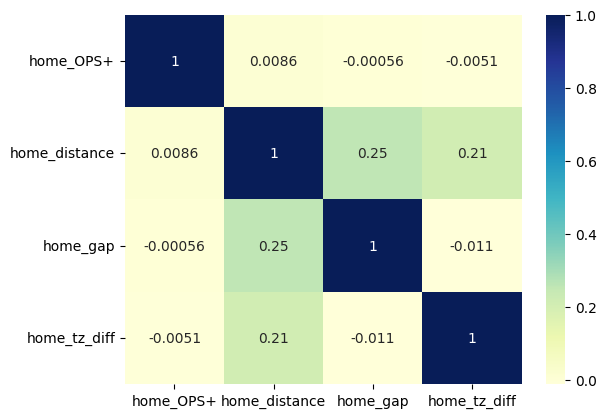

In [ ]:
home_coor_plot = sns.heatmap(df_final_home_coor.corr(), cmap="YlGnBu", annot=True)

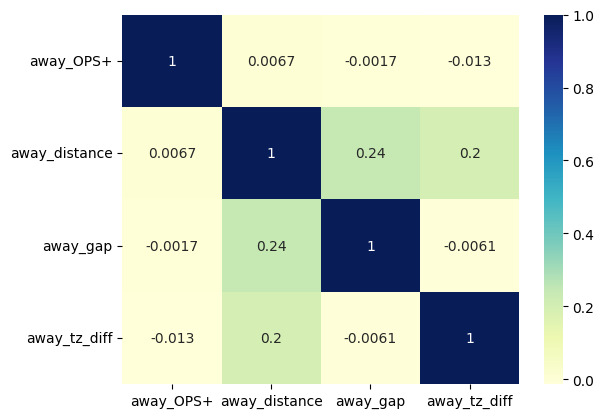

In [ ]:
away_coor_plot = sns.heatmap(df_final_away_coor.corr(), cmap="YlGnBu", annot=True)

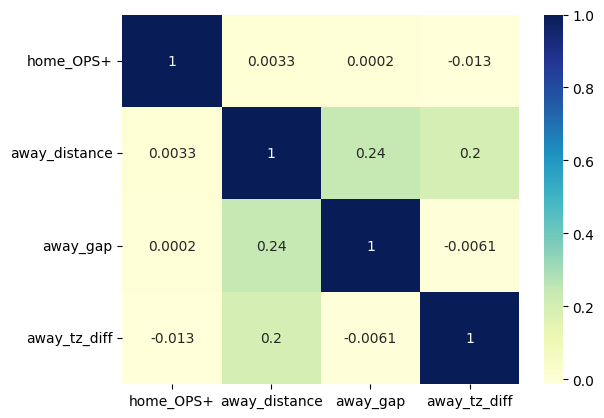

In [ ]:
away_coor_plot_def = sns.heatmap(df_final_away_coor_def.corr(), cmap="YlGnBu", annot=True)

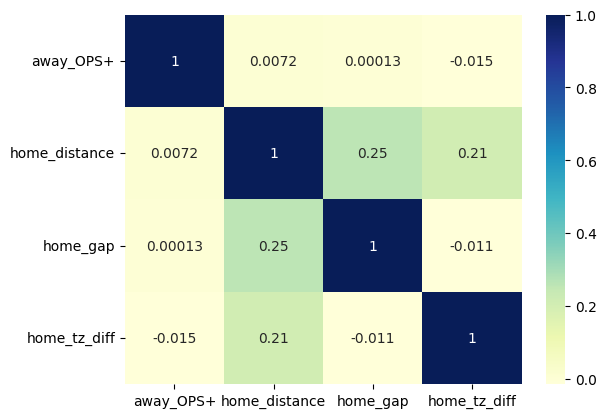

In [ ]:
home_coor_plot_def = sns.heatmap(df_final_home_coor_def.corr(), cmap="YlGnBu", annot=True)